## Introduction

Artificial Neural Networks draws its inspiration by looking at the human's brain architecture on how to build an intelligent machine. It is a Machine Learning model inspired by the networks of biological neurons found in our brains. They are the core of Deep Learning and are versatile, powerful, and scalable.

## Biological Neurons

It is a cell mostly found in animal brains. It is composed of a cell body containing the nucleus, many branching extensions called dendrites, and one very long extension called the axon. The axon splits off into many branches called telodendria, and at the tip of these branches are small structures called synapes, which are connected to the dendrites of other neurons.

Biological neurons produce short electrical impulses called action potentials which travel along the axons and make the synapses release chemicals signals called nerotransmitters. When a neuron receives enough of these neurotransmitters within a few milliseconds, it fires its own electrical impulses.

A single individual neuron behaves in a simple waves, but it is part of a vast network of billions. Collectively they are able to peform highly complex computations.

## Logical Computations with Neurons

A signle artificial neuron has one or more binary inputs and one binary output. The artificial neuron activates its output when more than a certain number of its inputs are active.

## The Perceptron

The Perceptron is the simplest ANN architectures invented in 1957 by Frank Rosenblatt. It is based ona slightly different artificial neuron called a threshold logic unit (TLU), or sometimes a linear threshold unit (LTU). The inputs and output are numbers and each input connection is associated with a weight. The TLU computes a weighted sum of its inputs that is $z = w_1x_1 + w_2x_2 + ... + w_nx_n = \bf{x^Tw}$

then applies a step function to that sum and outputs the results: $h_\bf{w}\bf{(x)} = step(z)$, where $z = \bf{x^Tw}$

<img src="images/chapter10/perceptron.png">


The most common step functionused in Perceptrons is the *Heaviside step function*. Sometimes the sign function is used instead.


\begin{equation}
 heaviside(z) =
  \begin{cases} 
      \hfill 0    \hfill & \text{ if $z$ < 0} \\
      \hfill 1 \hfill & \text{ if $z \ge$ 0} \\
  \end{cases}
\end{equation}



\begin{equation}
 sign(z) =
  \begin{cases} 
      \hfill -1 \hfill & \text{ if $z \lt$ 0} \\
      \hfill 0    \hfill & \text{ if $z$ = 0} \\
      \hfill +1 \hfill & \text{ if $z \gt$ 0} \\
  \end{cases}
\end{equation}


A signle TLU can be used for simple linear binary classification. It computes a linear combination of the inputs, and if the results exceeds a threshold, it outputs the positive class. Otherwise it outputs the negative class.

A Perceptron is simply composed of a signle layer of TLUs, with each TLU connected to all the inputs. When all the neurons in a layer are connected to every neuron in the previous layer, the layer is called a fully connected layer, or a dense layer. The inputs of the Perceptron are fed to special passthrough neruons called input neurons: they output whatever input they are fed. All the input neurons form the input later.

A Perceptron with two inputs and three outputs can classify instances simultaneously winto three different binary classes, which makes it a multioutput classifier.

<img src="images/chapter10/perceptron-structure.png">

W can compute the outputsof a fully connected layer using the following equation:

$ h_{w,b}(X) = \phi(\bf{XW + b})$

- X represents the inputs features, it has one row per data point and one column per feature.
- W is the weight matrix, it contains all the connection weights except for the ones from the bias neuron. It has one row per input neuron and one column per artificial neuron in the layer
- b contains the connection weights between the bias neuron and the artificial neurons.
- $\phi$ is the activation function when the artificial neurons are TLUs, it is a step function.


## How are Perceptrons Trained?

Hebb's rule state that cells that fire together, wire together"; that is, the connection weight between two neurons tends to increase when they fire simultaneously. Perceptrons are trained using a variant of the Hebb's rule that takes into account the error made by the network when it makes a prediction. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction. This is the following equation:

$w_{i,j}^{next step} = w_{i,j} + \eta(y_j -\hat{y_j})x_i$

- $w_{i,j}$ is the connection weight between the ith input neuron and the jth output neuron
- $x_i$ is the ith input value of the current training instance
- $\hat{y_j}$ is the output of the jth output neuron for the current training instance.
- $y_j$ is the target output of the jth output neuron for the current training instance.
- $\eta$ is the learning rate

The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns. However, if the training instances are linearly separable, the algorithm will converge to a solution.

## Multilayer Perceptron and Backpropagation

An MLP is composed of one input layer, one or more layers of TLUs, called hidden layers, and one final layer of TLUs called the output layer. The layers close to the input layer are usually called the lower layers, and the ones close to the outputs are usually called the upper layers. Every layer except the output layer includesa  bias neuron and is fully connected to the next layer.

When an ANN contains a deep stack of hidden layers, it is called a deep neural network. For many years researchers struggled to fina a way to train MLPs, without success. Until 1986, a paper introduced backpropagation training algorithm. It is gradient descent using an efficient technique for computing the gradients automatically: In just two passes, through the network (one forward and one backward), the backpropagation algorithm is able to compute the gradient of the network's error with regard to every single model parameter. It can find out how each connection weight and each bias term should be tweaked in order to reduce the error. Onceit has these gradients, it just performs a regular Gradient Descent step, and the whole process is repeated until the network converges to the solution.

Steps:

- it handles one mini-batch at a (e.g 32 instances each) and it goes through the full training set multiple times. Each pass is called an Epoch.

- Each mini-batch is passed to the input layer, which sends it to the first hidden layer. The algorithm computes the output of all the neurons in this layer. The results is passed on to the next layer, its outputs is computed and passed to the next layer, and so on until we get the output of the last layer, the output layer. This is the forward pass.

- Next the algorithm measures the network's output error (it utilizes a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).

- Then it computes how much each output connection contributed to the error. This is done analytically by applying the chain rule, which makes the step fast and precise.

- The algorithm then measures how much of these error contributions came from each connection in the layer below, again using the chain rule, working backward until the algorithm reaches the input layer. This reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network

- Finally the algorithm performs a Gradient Descent step to tweak all the connection weights in the network, using the error gradients it just computed.

For each training instance, the backpropagation algorithm first makes a prediction (forward pass) and measures the error, then goes through each layer in reverse to measure the error contribution from each connection (reverse pass), and finally tweaks the connection weights to reduce the error.

For MLPs to work properly, the authors of the paper made a key change to the MLP's architecture: they replaced the step function with the logistic function. This was essential because the step function contains only flat segments, so there is no gradient to work with. The logistic function has a well-defined nonzero derivative everywhere, allowing Gradient Descent to make some progress at every step. Backpropogation works well with other activation functions:


- Hyperbolic tangent function

- Rectified Linear Unit Function RELU


So what can we accomplish with neural nets?

## Regression MLPs 

First, MLPs can be used for regression tasks. If you want to predict a single value (e.g., the price of a house, given many of its features), then you just need a single output neuron: its output is the predicted value. For multivariate regression (i.e., to predict multiple values at once), you need one output neuron per output dimension. For example, to locate the center of an object in an image, you need to predict 2D coordinates, so you need two output neurons. If you also want to place a bounding box around the object, then you need two more numbers: the width and the height of the object. So, you end up with four output neurons. In general, when building an MLP for regression, you do not want to use any activation function for the output neurons, so they are free to output any range of values. If you want to guarantee that the output will always be positive, then you can use the ReLU activation function in the output layer. Alternatively, you can use the softplus activation function, which is a smooth variant of ReLU: softplus( z) = log( 1 + exp( z)). It is close to 0 when z is negative, and close to z when z is positive. Finally, if you want to guarantee that the predictions will fall within a given range of values, then you can use the logistic function or the hyperbolic tangent, and then scale the labels to the appropriate range: 0 to 1 for the logistic function and –1 to 1 for the hyperbolic tangent. The loss function to use during training is typically the mean squared error, but if you have a lot of outliers in the training set, you may prefer to use the mean absolute error instead. Alternatively, you can use the Huber loss, which is a combination of both.

## Classification MLPs 

MLPs can also be used for classification tasks. For a binary classification problem, you just need a single output neuron
using the logistic activation function: the output will be a number between 0 and 1, which you can interpret as the estimated probability of the positive class. The estimated probability of the negative class is equal to one minus that number. MLPs can also easily handle multilabel binary classification tasks (see Chapter 3). For example, you could have an email classification system that predicts whether each incoming email is ham or spam, and simultaneously predicts whether it is an urgent or nonurgent email. In this case, you would need two output neurons, both using the logistic activation function: the first would output the probability that the email is spam, and the second would output the probability that it is urgent. More generally, you would dedicate one output neuron for each positive class. Note that the output probabilities do not necessarily add up to 1. This lets the model output any combination of labels: you can have nonurgent ham, urgent ham, nonurgent spam, and perhaps even urgent spam (although that would probably be an error). If each instance can belong only to a single class, out of three or more possible classes (e.g., classes 0 through 9 for digit image classification), then you need to have one output neuron per class, and you should use the softmax activation function for the whole output layer (see Figure   10-9). The softmax function (introduced in Chapter   4) will ensure that all the estimated probabilities are between 0 and 1 and that they add up to 1 (which is required if the classes are exclusive). This is called multiclass classification.

For loss function, since we are predicting probability distributions, the cross-entropy loss is generally a good choice.

## Building an Image Classifier Using the Sequential API

In [1]:
import tensorflow as tf
from tensorflow import keras

#Fashion MNIST

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [2]:
X_train_full.shape

(60000, 28, 28)

In [3]:
X_train_full.dtype

dtype('uint8')

The dataset is already split into a training and test set, but there is no validation set, so we'll have to create one now. Additionally, since we are training a neural network using Gradient Descent, we must scale the input features. We will sclae the pixel intensities down to the 0-1 range by dividing them by 255.

In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

#X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:] / 255.
#y_valid, y_train  = y_train_full[:5000], y_train_full[5000:]
#X_test = X_test / 255.

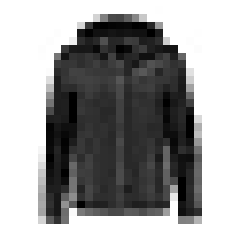

In [8]:
import matplotlib.pyplot as plt
#sample image
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [9]:
#The labels are represented by integers from 0 to 9
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [10]:
#here are the original class names:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

In [12]:
#validation set contains 5000 images
X_valid.shape

(5000, 28, 28)

In [13]:
#test set contains 10000 images
X_test.shape

(10000, 28, 28)

Here is a sample of the images in the dataset:

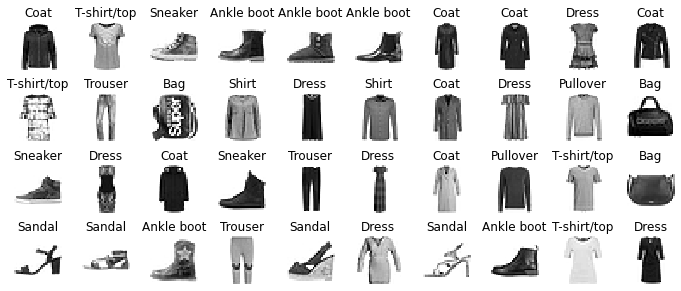

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

## Creating the model using the Sequential API

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [18]:
import numpy as np
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
#alternative approach, to writing the same model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

- this creates a sequential model, this is the simplest kind of keras model for NN that are just composed of a single stack of layers connected sequentially - this is referred to as the Sequential API

- Build the first layer and add it to the model. It is a flatten layer whose role is to conver each input image into a 1D array this layer does not have any parameters, its there to simply to preprocessing, if it receives x, it does x.reshape(-1,1). Alternatively we could add a `keras.layers.InputLayer` as the first layer, setting input_shape=[28,28]

- We add a Dense hidden layer with 300 neurons. It uses the ReLU activation function. Each `Dense` layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manges a vector of bias terms. When it receives some input data it computes $ h_{w,b}(X) = \phi(\bf{XW + b})$

- Then we add a second `Dense` hiddne layer with 100 neurons, also using the ReLU activation function.

- Finally, we add a `Dense` output layer with 10 neurons (1 per class) using the softmax activation function.

In [20]:
model.layers

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


The model's `summary()` method displays all the model's layers. Note that the `Dense` layers often have a lot of parameters. E.g, the first hidden layer has 784 x 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters. This gives the model a lot of flexibility to fir the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data.

In [22]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [23]:
model.get_layer(hidden1.name) is hidden1

True

In [24]:
weights, biases = hidden1.get_weights()

In [25]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
biases.shape

(300,)

Notice that the `Dense` layer initialized the connection weights randomly and the biases were initialized to zeros.

## Compiling the Model

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

We use the `sparse_categorical_crossentropy` loss because we have sparse labels (for each instance, there is just a target class index, from 0-9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g [0, 0, 0, 1, 0, 0, 0, 0, 0] to represent class 3, then we would need to use the `categorical_crossentropy` loss instead. If we were doing binary classification (with one or more binary labels), then we would use the `sigmoid` activation function in the output layer instad of the `softmax` activation function, and we would use the `binary_crossentropy` loss.

`sgd` means that we will train the model using simple Stochastic Gradient Descent.

Since this model is a classifier, it's useful to measure its `accuracy` during training and evaluation.

In [29]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4842 - accuracy: 0.8317 - val_loss: 0.4348 - val_accuracy: 0.8534
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4391 - accuracy: 0.8456 - val_loss: 0.5347 - val_accuracy: 0.7982
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4123 - accuracy: 0.8561 - val_loss: 0.3917 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3940 - accuracy: 0.8620 - val_loss: 0.3744 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3752 - accuracy: 0.8677 - val_loss: 0.3707 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3632 - accuracy: 0.8715 - val_loss: 0.3612 - val_accuracy:

In [30]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [31]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

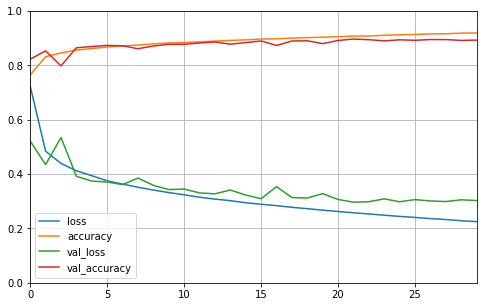

In [33]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3374 - accuracy: 0.8825


[0.33740103244781494, 0.8824999928474426]

In [35]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

For each instance, the model estimates one probability per class, from class 0 to class 9. E.g in the first image, it estimates that the probability of class 9 (ankle boots) is 96%, the probability of class 5 (sandal) is 3% and the probability of class 7 (sneaker) is 1%. If you only care about the class with the highest estimated probability, then you can use the `predict_classes()` method instead:

In [36]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [37]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

## Building a Regression MLP Using the Sequential API

We created a classification MLP, but we can also create a Regression MLP.

In [38]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [41]:
X_train.shape

(11610, 8)

In [40]:
np.random.seed(42)
tf.random.set_seed(42)

In [42]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4875 - val_loss: 0.4656

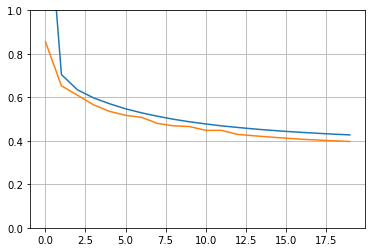

In [43]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

The Regression model is very similar to the classification model. The main differences are the fact that the output layer has a single neuron (since we only want to predict a single value) and uses no activation function. The loss function is the mean squared error. Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons (30) than before, to avoid overfitting.

## Building Complex Models Using the Functional API

Not all models are simple Sequential Neural Network Models. One of such example is a nonsequential neural network that is wide and deep. This architecture was introduced in a 2016 paper by Heng-Tze Cheng. It connects all or part of the inputs directly to the output layer. This architecture makes it possible for the neural network to learn both deep patterns (through the deep path) and simple rules (through the short path). In contrast, a regular MLP forces all the data to flow through the full stack of layers, so simple patterns in the data may end up being distorted by this sequence of transformations.

<img src="images/chapter10/deep-wide.png">

In [44]:
np.random.seed(42)
tf.random.set_seed(42)

In [45]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

- First we create an `Input` object. This is a specification fo the kind of input the model will get including its shape and dtype.

- Next, we create a `Dense` layer with 30 neurons, using the ReLU activation function. As soon as it is created, notice that we call it like a function, passing it to the input. We are simply telling Keras how it should connect the layers together; no actual data is being processed yet.

- We then create a second hidden layer, and again, we use it as a function. We pass it the output of the first hidden layer (hidden1).

- The `concatenate` layer is used to concatenate the input and the output of the second hidden layer.

- Then we creat ethe output layer, with a single neuron and no activation function, we call it like a function passing the result of the concatenation.

In [47]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [48]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 0s 902us/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 0s 987us/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 0s 780us/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 0s 904us/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 0s 838us/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 0s 962us/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 0s 932us/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 0s 904us/step - loss: 0.4659 - 